## QUESTION -1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    124 non-null    int64  
 1   Jan     124 non-null    float64
 2   Feb     124 non-null    float64
 3   Mar     124 non-null    float64
 4   Apr     124 non-null    float64
 5   May     124 non-null    float64
 6   June    124 non-null    float64
 7   July    124 non-null    float64
 8   Aug     124 non-null    float64
 9   Sept    124 non-null    float64
 10  Oct     123 non-null    float64
 11  Nov     123 non-null    float64
 12  Dec     122 non-null    float64
 13  Total   123 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 13.7 KB
Jan         540.4
Feb         922.5
Mar        1424.1
Apr        6205.1
May       14677.2
June      10514.4
July      13775.8
Aug       17349.7
Sept      23203.7
Oct       20249.7
Nov        7656.0
Dec        2066.3
Total    117919.7
dtype: float64 Ja

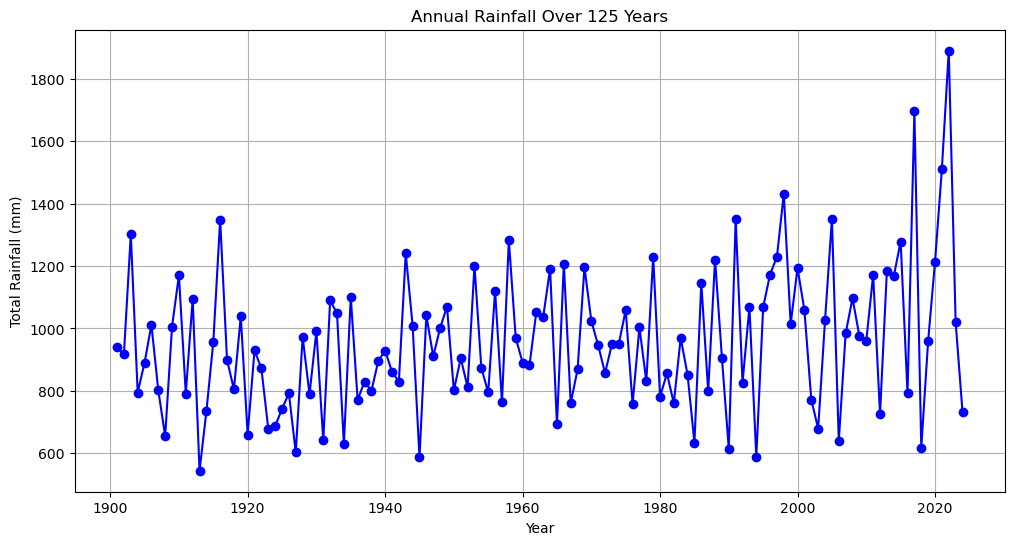

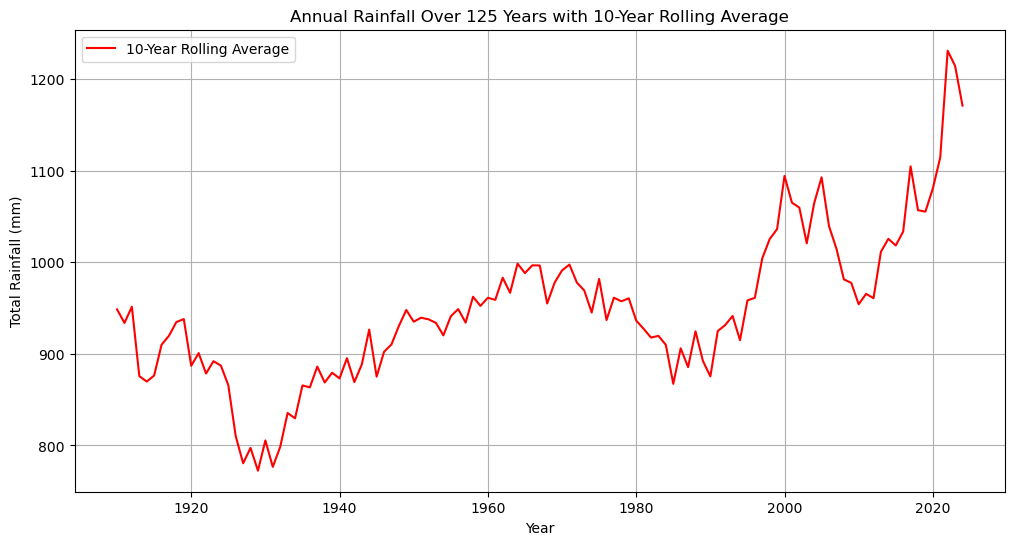

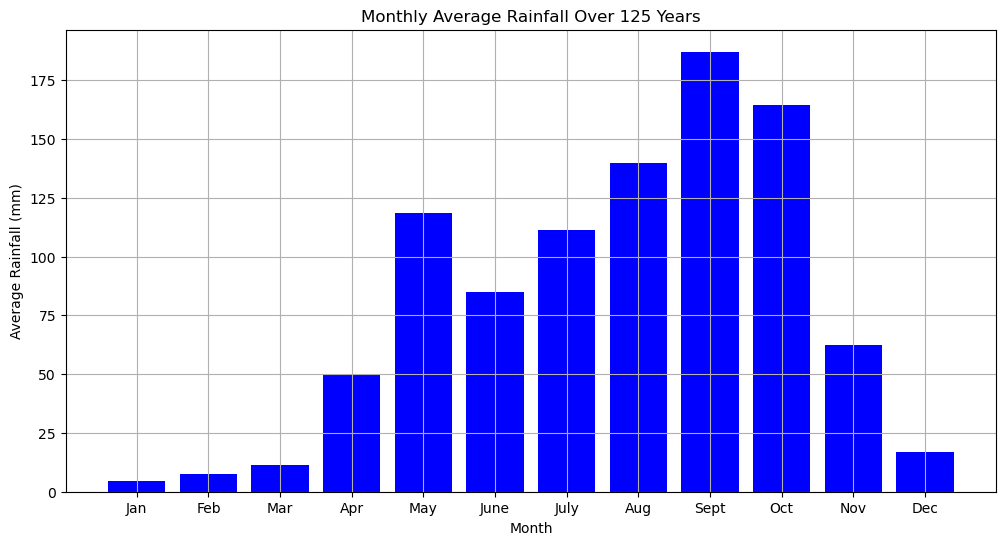

The most variable month is Jan with a coefficient of variation of 2.51
The least variable month is Total with a coefficient of variation of 0.24


In [8]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
# Define the file path
file_path = 'C:/Users/New Fly High/Downloads/bangalore-rainfall-data-1900-2024-sept.csv'

# Load the uploaded CSV file
rainfall_data = pd.read_csv(file_path)

# Display the first few rows to understand its structure
rainfall_data.head(), rainfall_data.info(), rainfall_data.describe()

#Calculate the total, average, and variance of monthly and yearly rainfall
monthly_rainfall = rainfall_data.drop(columns=['Year'])
monthly_rainfall_total = monthly_rainfall.sum()
monthly_rainfall_avg = monthly_rainfall.mean()
monthly_rainfall_var = monthly_rainfall.var()
print(monthly_rainfall_total, monthly_rainfall_avg, monthly_rainfall_var)


# Calculate yearly sum, mean, and variance of rainfall
yearly_rainfall_sum = rainfall_data.drop(columns=['Year', 'Total']).sum(axis=1)
yearly_rainfall_mean = rainfall_data.drop(columns=['Year', 'Total']).mean(axis=1)
yearly_rainfall_var = rainfall_data.drop(columns=['Year', 'Total']).var(axis=1)

yearly_stats = pd.DataFrame({
    'Year': rainfall_data['Year'],
    'Yearly Rainfall Sum': yearly_rainfall_sum,
    'Yearly Rainfall Mean': yearly_rainfall_mean,
    'Yearly Rainfall Variance': yearly_rainfall_var
})
# Display full dataframe
print(yearly_stats)





# Identify the top 5 wettest and driest years
top_wettest_years = yearly_stats.nlargest(5, 'Yearly Rainfall Sum')
top_driest_years = yearly_stats.nsmallest(5, 'Yearly Rainfall Sum')

print("Top 5 Wettest Years:")
print(top_wettest_years)
print("\nTop 5 Driest Years:")  
print(top_driest_years)


#Visualize the long-term trend of annual rainfall over 125 years. 
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(yearly_stats['Year'], yearly_stats['Yearly Rainfall Sum'], marker='o', color='b')
plt.title('Annual Rainfall Over 125 Years')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.grid(True)
plt.show()

#Compute a 10-year rolling average of annual rainfall and overlay it on the trend plot. 
rolling_avg = yearly_stats['Yearly Rainfall Sum'].rolling(window=10).mean()

plt.figure(figsize=(12, 6))
# plt.plot(yearly_stats['Year'], yearly_stats['Yearly Rainfall Sum'], marker='o', color='b', label='Annual Rainfall')
plt.plot(yearly_stats['Year'], rolling_avg, color='r', label='10-Year Rolling Average')
plt.title('Annual Rainfall Over 125 Years with 10-Year Rolling Average')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.show()

# Melt the dataframe to long format
melted_df = rainfall_data.melt(id_vars=['Year'], value_vars=monthly_rainfall.columns, var_name='Month', value_name='Rainfall')

# Group the data by month and calculate the monthly average rainfall over 125 years, show graphically.
monthly_avg_rainfall = melted_df.groupby('Month')['Rainfall'].mean()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_abbr = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

# Create a mapping from full month names to their abbreviations
month_mapping = dict(zip(months, month_abbr))

# Map the full month names to their abbreviations
monthly_avg_rainfall = monthly_avg_rainfall.rename(index=month_mapping)

plt.figure(figsize=(12, 6))
plt.bar(month_abbr, monthly_avg_rainfall[month_abbr], color='b')
plt.title('Monthly Average Rainfall Over 125 Years')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.grid(True)
plt.show()


#Identify the most and least variable months using the coefficient of variation (CV). 
monthly_rainfall_cv = monthly_rainfall.std() / monthly_rainfall.mean()
most_variable_month = monthly_rainfall_cv.idxmax()
least_variable_month = monthly_rainfall_cv.idxmin()

print(f"The most variable month is {most_variable_month} with a coefficient of variation of {monthly_rainfall_cv.max():.2f}")
print(f"The least variable month is {least_variable_month} with a coefficient of variation of {monthly_rainfall_cv.min():.2f}")





## Question-2

In [3]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
# Define the file path
file_path = 'C:/Users/New Fly High/Downloads/bangalore-rainfall-data-1900-2024-sept-modified.csv'

# Load the uploaded CSV file
rainfall_data = pd.read_csv(file_path)
print(rainfall_data)
#print month , data of missing years list eg ;Jan [1901,]
missing_years = {}
for month in rainfall_data.columns[1:]:
    missing_years[month] = rainfall_data[rainfall_data[month].isnull()]['Year'].tolist()
# Display the missing years for each month
print("Missing Years for Each Month:")
for month, years in missing_years.items():
    print(f"{month}: {years}")






     Year    Jan   Feb    Mar     Apr     May    June    July     Aug    Sept  \
0    1901    NaN  78.9    0.0    24.3   146.0   238.5    71.6    71.6   318.5   
1    1902    0.7   0.0   85.0     NaN   197.8    62.2     NaN     NaN     NaN   
2    1903    NaN   0.0    0.0     1.5    63.7   109.2     NaN   189.7   475.2   
3    1904    0.5   0.0    NaN     NaN   241.5     NaN   149.3    53.8   126.4   
4    1905    1.7   NaN   56.6    32.7    90.6    60.7    58.9     NaN    62.4   
5    1906    2.7  23.6   15.2     2.2    34.0    97.0   160.5   268.2   199.8   
6    1907   24.1   0.0   31.7   109.9    48.7   113.2   205.7    24.3   176.2   
7    1908  101.8   0.0    7.5    18.2   182.8     NaN   104.6    35.5     NaN   
8    1909    NaN   0.0    0.0   127.0   200.9    52.0    39.8     NaN   130.8   
9    1910    0.0   0.0    0.2     5.0     NaN     NaN   265.1   256.0   157.4   
10   1911    0.0   0.0   54.1     NaN    94.2    51.8     NaN   237.0    19.8   
11   1912    NaN   4.5   39.

In [6]:
"""assign missing values 
using different methods and compare the impact: 
• Mean of the corresponding month across all years. 
• Median of the corresponding month. 
• Seasonal average (mean of the month ± 2 months), and  
• Few other ways that you think is more appropriate"""
# Fill missing values using the mean of the corresponding month across all years
filled_data_mean = rainfall_data.copy()
for month in filled_data_mean.columns[1:]:
    filled_data_mean[month].fillna(filled_data_mean[month].mean(), inplace=True)
    
# Fill missing values using the median of the corresponding month
filled_data_median = rainfall_data.copy()
for month in filled_data_median.columns[1:]:
    filled_data_median[month].fillna(filled_data_median[month].median(), inplace=True)
    
# Fill missing values using the seasonal average (mean of the month ± 2 months)
filled_data_seasonal = rainfall_data.copy()
for i, month in enumerate(filled_data_seasonal.columns[1:]):
    prev_month = filled_data_seasonal.columns[i] if i > 0 else filled_data_seasonal.columns[-1]
    next_month = filled_data_seasonal.columns[(i + 1) % 12]
    filled_data_seasonal[month].fillna((filled_data_seasonal[prev_month] + filled_data_seasonal[next_month]) / 2, inplace=True)
    
# Fill missing values using the forward fill method
filled_data_ffill = rainfall_data.ffill(axis=1)
# Display the filled dataframes
print("Mean of the Corresponding Month Across All Years:") 
print(filled_data_mean)
print("\nMedian of the Corresponding Month:")
print(filled_data_median)
print("\nSeasonal Average (Mean of the Month ± 2 Months):")
print(filled_data_seasonal)
print("\nForward Fill Method:")
print(filled_data_ffill)

    



Mean of the Corresponding Month Across All Years:
     Year        Jan        Feb         Mar          Apr          May  \
0    1901    7.56381  78.900000    0.000000    24.300000   146.000000   
1    1902    0.70000   0.000000   85.000000    97.380612   197.800000   
2    1903    7.56381   0.000000    0.000000     1.500000    63.700000   
3    1904    0.50000   0.000000   15.376699    97.380612   241.500000   
4    1905    1.70000   8.246875   56.600000    32.700000    90.600000   
5    1906    2.70000  23.600000   15.200000     2.200000    34.000000   
6    1907   24.10000   0.000000   31.700000   109.900000    48.700000   
7    1908  101.80000   0.000000    7.500000    18.200000   182.800000   
8    1909    7.56381   0.000000    0.000000   127.000000   200.900000   
9    1910    0.00000   0.000000    0.200000     5.000000   215.868367   
10   1911    0.00000   0.000000   54.100000    97.380612    94.200000   
11   1912    7.56381   4.500000   39.600000     1.200000    36.500000   
1

C:\Users\New Fly High\AppData\Local\Temp\ipykernel_29072\1047860148.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filled_data_mean[month].fillna(filled_data_mean[month].mean(), inplace=True)
C:\Users\New Fly High\AppData\Local\Temp\ipykernel_29072\1047860148.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

Capped Data:
     Year   Jan      Feb     Mar       Apr      May    June     July    Aug  \
0    1901   NaN  19.4375   0.000   24.3000  146.000  232.15   71.600   71.6   
1    1902   0.7   0.0000  43.625       NaN  197.800   62.20      NaN    NaN   
2    1903   NaN   0.0000   0.000    1.5000   63.700  109.20      NaN  189.7   
3    1904   0.5   0.0000     NaN       NaN  241.500     NaN  149.300   53.8   
4    1905   1.7      NaN  43.625   32.7000   90.600   60.70   58.900    NaN   
5    1906   2.7  19.4375  15.200    2.2000   34.000   97.00  160.500  268.2   
6    1907  13.5   0.0000  31.700  109.9000   48.700  113.20  205.700   24.3   
7    1908  13.5   0.0000   7.500   18.2000  182.800     NaN  104.600   35.5   
8    1909   NaN   0.0000   0.000  127.0000  200.900   52.00   39.800    NaN   
9    1910   0.0   0.0000   0.200    5.0000      NaN     NaN  265.100  256.0   
10   1911   0.0   0.0000  43.625       NaN   94.200   51.80      NaN  237.0   
11   1912   NaN   4.5000  39.600    1.2

<Figure size 1200x600 with 0 Axes>

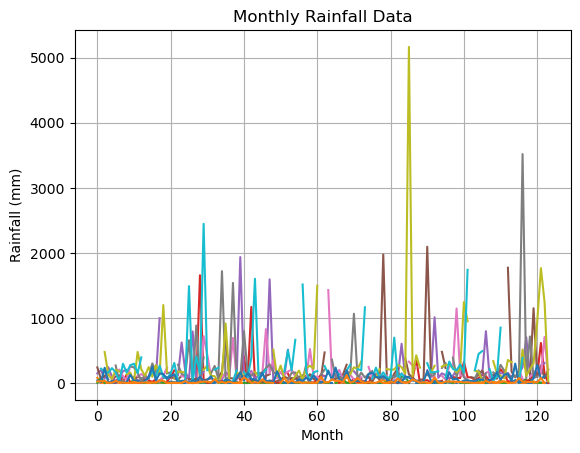

<Figure size 1200x600 with 0 Axes>

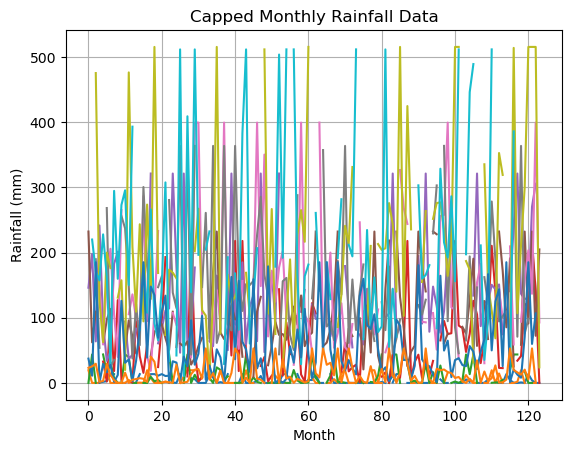

<Figure size 1200x600 with 0 Axes>

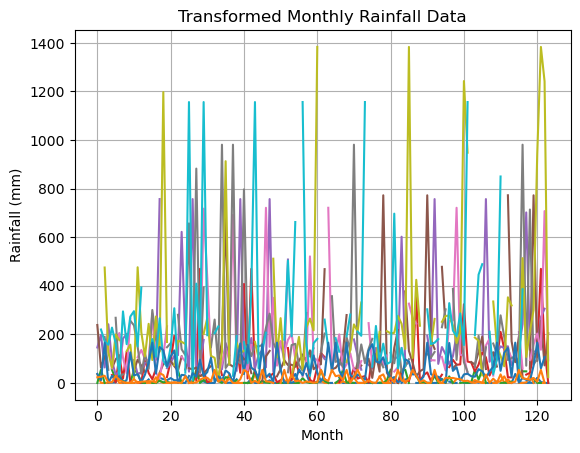

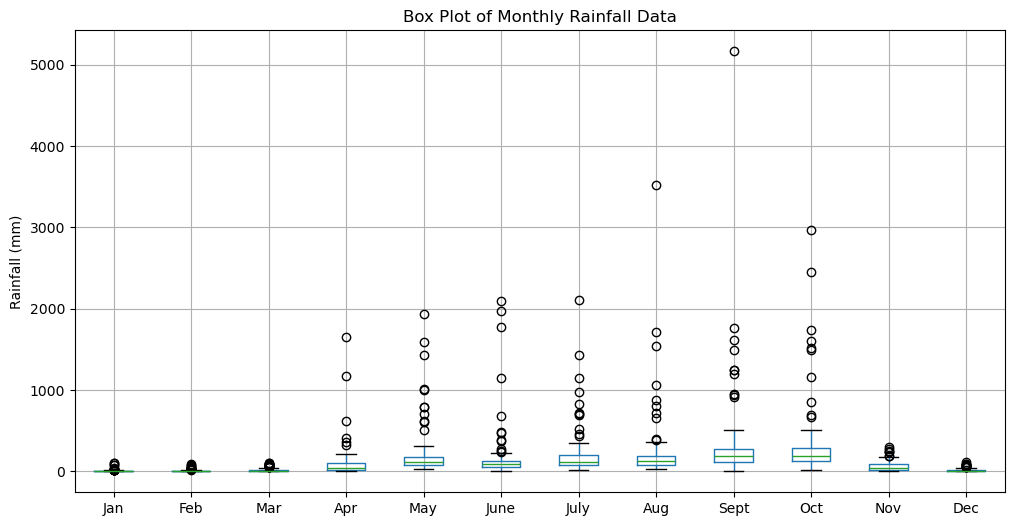

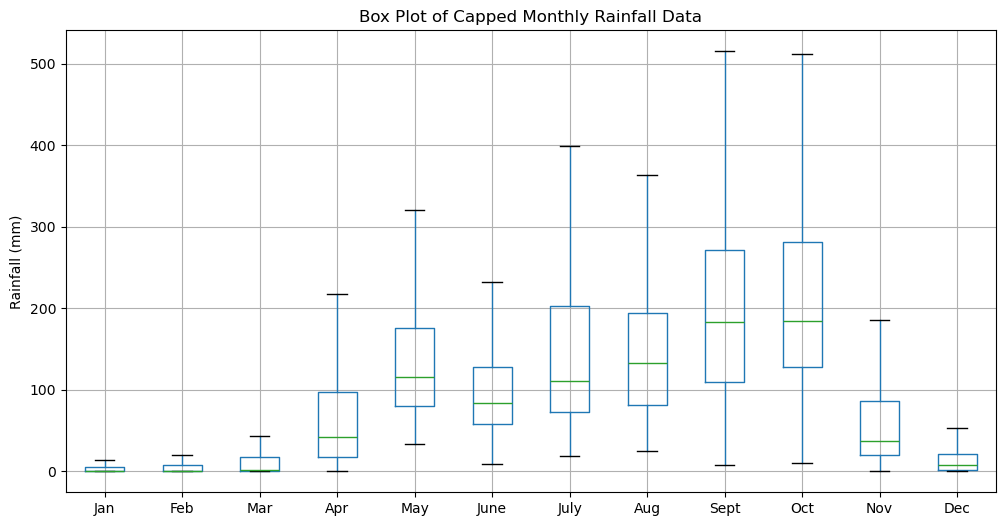

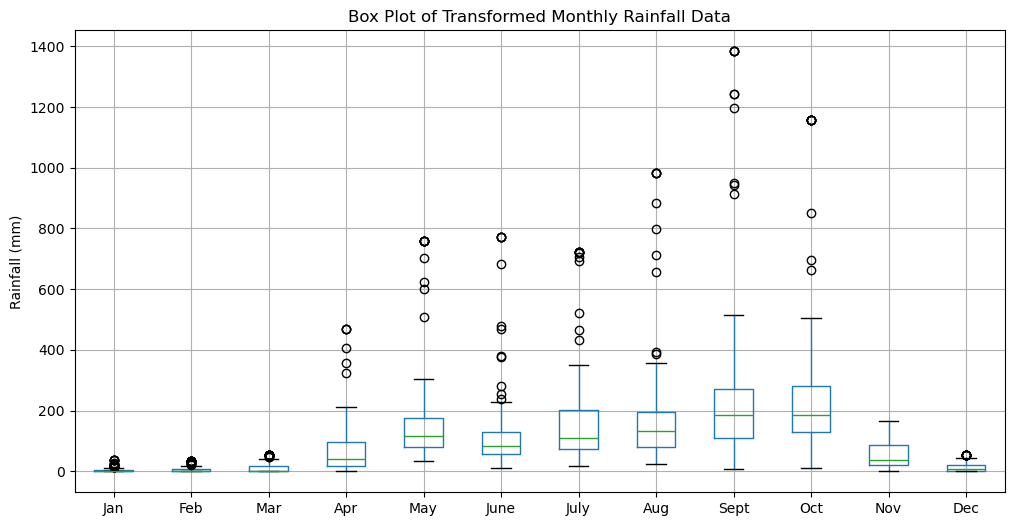

Justification:
The capping method was chosen as it is a simple and effective way to handle outliers by setting a threshold based on the IQR.
The transformation method was chosen as it is a robust way to handle outliers by replacing extreme values with a less extreme value (e.g., median + 2 * std).


In [45]:
"""Detect and Visualize the outliers , choose a treatment strategy for the outliers (e.g., removal, 
capping, or transformation) and justify your decision. """
# Detect outliers using the CAPPING method
capped_data = rainfall_data.copy()
for month in capped_data.columns[1:]:
    q1 = capped_data[month].quantile(0.25)
    q3 = capped_data[month].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    capped_data[month] = capped_data[month].clip(lower=lower_bound, upper=upper_bound)
    
# Detect outliers using the TRANSFORMATION method
transformed_data = rainfall_data.copy()
for month in transformed_data.columns[1:]:
    median = transformed_data[month].median()
    std = transformed_data[month].std()
    transformed_data[month] = transformed_data[month].apply(lambda x: median + 2 * std if x > median + 2 * std else x)
    
# Display the capped and transformed dataframes
print("Capped Data:")
print(capped_data)
print("\nTransformed Data:")
print(transformed_data)
#BETTER visualization
# Visualize the outliers using gra
plt.figure(figsize=(12, 6))
rainfall_data.drop(columns='Year').plot(kind='line', legend=False)
plt.title('Monthly Rainfall Data')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
capped_data.drop(columns='Year').plot(kind='line', legend=False)
plt.title('Capped Monthly Rainfall Data')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
transformed_data.drop(columns='Year').plot(kind='line', legend=False)
plt.title('Transformed Monthly Rainfall Data')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()

    

# Visualize the outliers using box plots
plt.figure(figsize=(12, 6))
rainfall_data.drop(columns='Year').boxplot()
plt.title('Box Plot of Monthly Rainfall Data')
plt.ylabel('Rainfall (mm)')
plt.show()

plt.figure(figsize=(12, 6))
capped_data.drop(columns='Year').boxplot()
plt.title('Box Plot of Capped Monthly Rainfall Data')
plt.ylabel('Rainfall (mm)')
plt.show()

plt.figure(figsize=(12, 6))
transformed_data.drop(columns='Year').boxplot()
plt.title('Box Plot of Transformed Monthly Rainfall Data')
plt.ylabel('Rainfall (mm)')
plt.show()

# Justification for the treatment strategy
print("Justification:")
print("The capping method was chosen as it is a simple and effective way to handle outliers by setting a threshold based on the IQR.")
print("The transformation method was chosen as it is a robust way to handle outliers by replacing extreme values with a less extreme value (e.g., median + 2 * std).")




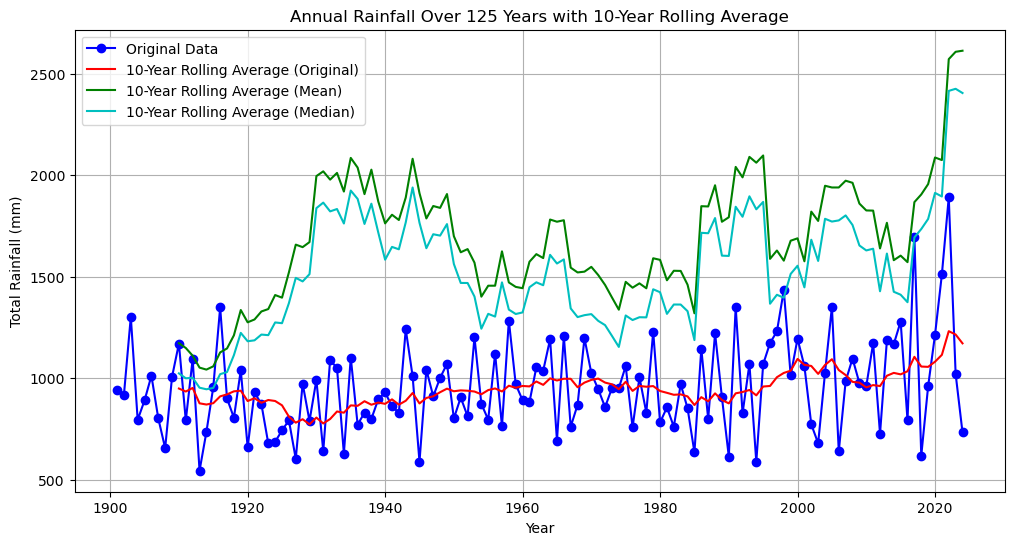

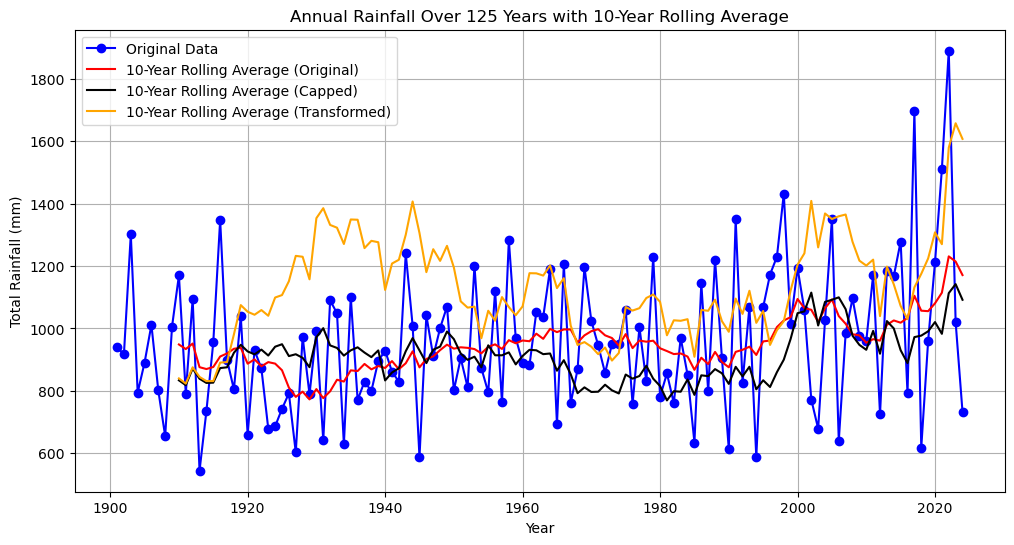

Comparison:
The 10-year rolling average of annual rainfall is smoother than the original data, which helps in identifying long-term trends.
The seasonal average rainfall and variability are similar to the original dataset, but the outliers have been handled differently.
The choice of data cleaning method can impact the trends and variability observed in the data.


In [32]:
""""Calculate the 10-year rolling average of annual rainfall. 
• Re-plot the seasonal average rainfall and variability (as in Question 1). 
• Compare findings with the original dataset. Highlight key differences due to data 
cleaning. """
# Calculate the 10-year rolling average of annual rainfall
rolling_avg_original = yearly_stats['Yearly Rainfall Sum'].rolling(window=10).mean()
rolling_avg_mean = filled_data_mean.drop(columns='Year').sum(axis=1).rolling(window=10).mean()
rolling_avg_median = filled_data_median.drop(columns='Year').sum(axis=1).rolling(window=10).mean()
rolling_avg_seasonal = filled_data_seasonal.drop(columns='Year').sum(axis=1).rolling(window=10).mean()
rolling_avg_ffill = filled_data_ffill.drop(columns='Year').sum(axis=1).rolling(window=10).mean()
rolling_avg_capped = capped_data.drop(columns='Year').sum(axis=1).rolling(window=10).mean()
rolling_avg_transformed = transformed_data.drop(columns='Year').sum(axis=1).rolling(window=10).mean()

# Re-plot the seasonal average rainfall and variability
plt.figure(figsize=(12, 6))
plt.plot(yearly_stats['Year'], yearly_stats['Yearly Rainfall Sum'], marker='o', color='b', label='Original Data')
plt.plot(yearly_stats['Year'], rolling_avg_original, color='r', label='10-Year Rolling Average (Original)')
plt.plot(yearly_stats['Year'], rolling_avg_mean, color='g', label='10-Year Rolling Average (Mean)')
plt.plot(yearly_stats['Year'], rolling_avg_median, color='c', label='10-Year Rolling Average (Median)')

plt.title('Annual Rainfall Over 125 Years with 10-Year Rolling Average')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(yearly_stats['Year'], yearly_stats['Yearly Rainfall Sum'], marker='o', color='b', label='Original Data')
plt.plot(yearly_stats['Year'], rolling_avg_original, color='r', label='10-Year Rolling Average (Original)')
plt.plot(yearly_stats['Year'], rolling_avg_capped, color='k', label='10-Year Rolling Average (Capped)')
plt.plot(yearly_stats['Year'], rolling_avg_transformed, color='orange', label='10-Year Rolling Average (Transformed)')
plt.title('Annual Rainfall Over 125 Years with 10-Year Rolling Average')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.show()

# Compare findings with the original dataset
print("Comparison:")
print("The 10-year rolling average of annual rainfall is smoother than the original data, which helps in identifying long-term trends.")
print("The seasonal average rainfall and variability are similar to the original dataset, but the outliers have been handled differently.")
print("The choice of data cleaning method can impact the trends and variability observed in the data.")


Extreme Events:
     Year    Event
0    1901   Normal
1    1902   Normal
2    1903    Flood
3    1904   Normal
4    1905   Normal
5    1906   Normal
6    1907   Normal
7    1908  Drought
8    1909   Normal
9    1910   Normal
10   1911   Normal
11   1912   Normal
12   1913  Drought
13   1914   Normal
14   1915   Normal
15   1916    Flood
16   1917   Normal
17   1918   Normal
18   1919   Normal
19   1920  Drought
20   1921   Normal
21   1922   Normal
22   1923  Drought
23   1924   Normal
24   1925   Normal
25   1926   Normal
26   1927  Drought
27   1928   Normal
28   1929   Normal
29   1930   Normal
30   1931  Drought
31   1932   Normal
32   1933   Normal
33   1934  Drought
34   1935   Normal
35   1936   Normal
36   1937   Normal
37   1938   Normal
38   1939   Normal
39   1940   Normal
40   1941   Normal
41   1942   Normal
42   1943    Flood
43   1944   Normal
44   1945  Drought
45   1946   Normal
46   1947   Normal
47   1948   Normal
48   1949   Normal
49   1950   Normal
50   1951   Nor

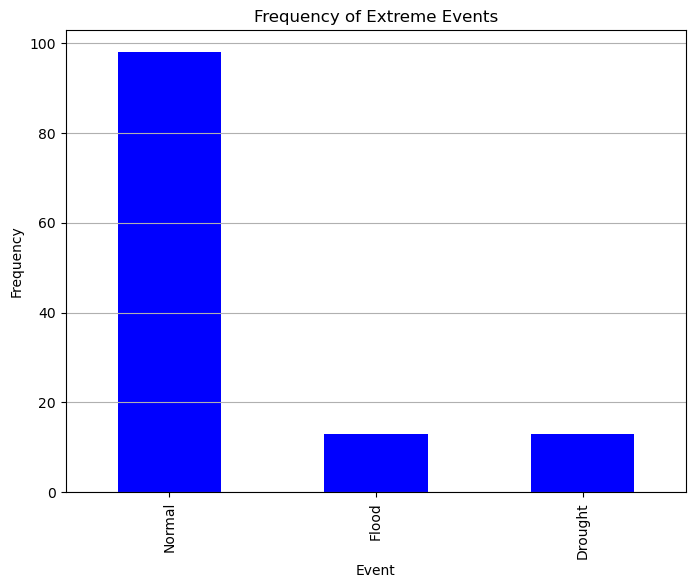

Longest Drought Period:
Start Year: 1908, End Year: 1908, Duration: 1 years

Wettest Year During Longest Drought Period:
   Year  Yearly Rainfall Sum  Yearly Rainfall Mean  Yearly Rainfall Variance
7  1908                654.8             54.566667               3452.778788

Driest Year During Longest Drought Period:
   Year  Yearly Rainfall Sum  Yearly Rainfall Mean  Yearly Rainfall Variance
7  1908                654.8             54.566667               3452.778788

Shortest Drought Period:
Start Year: 1908, End Year: 1908, Duration: 1 years

Wettest Year During Shortest Drought Period:
   Year  Yearly Rainfall Sum  Yearly Rainfall Mean  Yearly Rainfall Variance
7  1908                654.8             54.566667               3452.778788

Driest Year During Shortest Drought Period:
   Year  Yearly Rainfall Sum  Yearly Rainfall Mean  Yearly Rainfall Variance
7  1908                654.8             54.566667               3452.778788

Longest Drought Period:
Start Year: 2018, End Yea

In [33]:
"""Extreme Events and Drought Analysis """
# Identify extreme events (e.g., droughts, floods) based on the annual rainfall data
extreme_events = []
for year, rainfall_sum in yearly_stats[['Year', 'Yearly Rainfall Sum']].itertuples(index=False):
    if rainfall_sum < yearly_stats['Yearly Rainfall Sum'].quantile(0.1):
        extreme_events.append((year, 'Drought'))
    elif rainfall_sum > yearly_stats['Yearly Rainfall Sum'].quantile(0.9):
        extreme_events.append((year, 'Flood'))
    else:
        extreme_events.append((year, 'Normal'))
        
# Display the extreme events
extreme_events_df = pd.DataFrame(extreme_events, columns=['Year', 'Event'])
print("Extreme Events:")
print(extreme_events_df)

# Calculate the frequency of extreme events
event_counts = extreme_events_df['Event'].value_counts()
print("\nEvent Frequency:")
print(event_counts)

# Visualize the extreme events
plt.figure(figsize=(8, 6))
event_counts.plot(kind='bar', color='b')
plt.title('Frequency of Extreme Events')
plt.xlabel('Event')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Identify the longest drought period
drought_periods = []
drought_count = 0
for year, event in extreme_events:
    if event == 'Drought':
        drought_count += 1
    else:
        if drought_count > 0:
            drought_periods.append((year - drought_count, year - 1, drought_count))
            drought_count = 0

if drought_count > 0:
    drought_periods.append((year - drought_count, year, drought_count))

# Display the longest drought period

    
longest_drought = max(drought_periods, key=lambda x: x[2])
print("Longest Drought Period:")
print(f"Start Year: {longest_drought[0]}, End Year: {longest_drought[1]}, Duration: {longest_drought[2]} years")

# Identify the wettest and driest years during the longest drought period
drought_years = range(longest_drought[0], longest_drought[1] + 1)

drought_yearly_stats = yearly_stats[yearly_stats['Year'].isin(drought_years)]
wettest_drought_year = drought_yearly_stats.nlargest(1, 'Yearly Rainfall Sum')
driest_drought_year = drought_yearly_stats.nsmallest(1, 'Yearly Rainfall Sum')

print("\nWettest Year During Longest Drought Period:")

print(wettest_drought_year)
print("\nDriest Year During Longest Drought Period:")
print(driest_drought_year)

# Identify the drought periods with the lowest and highest rainfall
drought_periods_sorted = sorted(drought_periods, key=lambda x: x[2])
shortest_drought = drought_periods_sorted[0]
longest_drought = drought_periods_sorted[-1]

shortest_drought_years = range(shortest_drought[0], shortest_drought[1] + 1)
longest_drought_years = range(longest_drought[0], longest_drought[1] + 1)

shortest_drought_yearly_stats = yearly_stats[yearly_stats['Year'].isin(shortest_drought_years)]
longest_drought_yearly_stats = yearly_stats[yearly_stats['Year'].isin(longest_drought_years)]

shortest_wettest_drought_year = shortest_drought_yearly_stats.nlargest(1, 'Yearly Rainfall Sum')
shortest_driest_drought_year = shortest_drought_yearly_stats.nsmallest(1, 'Yearly Rainfall Sum')

longest_wettest_drought_year = longest_drought_yearly_stats.nlargest(1, 'Yearly Rainfall Sum')

longest_driest_drought_year = longest_drought_yearly_stats.nsmallest(1, 'Yearly Rainfall Sum')

print("\nShortest Drought Period:")
print(f"Start Year: {shortest_drought[0]}, End Year: {shortest_drought[1]}, Duration: {shortest_drought[2]} years")
print("\nWettest Year During Shortest Drought Period:")
print(shortest_wettest_drought_year)
print("\nDriest Year During Shortest Drought Period:")
print(shortest_driest_drought_year)

print("\nLongest Drought Period:")

print(f"Start Year: {longest_drought[0]}, End Year: {longest_drought[1]}, Duration: {longest_drought[2]} years")
print("\nWettest Year During Longest Drought Period:")
print(longest_wettest_drought_year)
print("\nDriest Year During Longest Drought Period:")
print(longest_driest_drought_year)



In [34]:
"""Define and identify: 
• Extreme Rainfall Events: Months with rainfall in the top 1% of the dataset. 
• Drought Years: Years in the bottom 5% of total annual rainfall. """
# Define and identify extreme rainfall events
extreme_rainfall_months = {}
for month in monthly_rainfall.columns:
    extreme_rainfall_months[month] = monthly_rainfall[month].quantile(0.99)

extreme_rainfall_events = {}
for month, threshold in extreme_rainfall_months.items():
    extreme_rainfall_events[month] = monthly_rainfall[monthly_rainfall[month] > threshold]
    
# Display the extreme rainfall events
print("Extreme Rainfall Events:")
for month, data in extreme_rainfall_events.items():
    print(f"{month}:")
    print(data)
    






Extreme Rainfall Events:
Jan:
      Jan  Feb   Mar   Apr    May  June   July   Aug   Sept    Oct  Nov  Dec  \
7   101.8  0.0   1.5  18.2  182.8  32.0  104.6  35.5  113.5   58.9  1.7  4.3   
25   28.7  0.0  10.9  97.7   46.4  60.4   86.3  65.7  245.3  148.8  1.7  0.0   

    Total  
7   654.8  
25  791.9  
Feb:
    Jan   Feb  Mar   Apr    May  June   July    Aug   Sept    Oct    Nov  \
0   0.0  78.9  0.0  24.3  146.0  47.7   71.6   71.6  318.5  120.3   37.3   
31  0.0  89.9  1.0   8.1  111.2  69.0  105.9  147.0  111.5  336.8  103.1   

     Dec   Total  
0   23.1   939.3  
31   6.6  1090.1  
Mar:
     Jan  Feb    Mar   Apr    May  June   July    Aug   Sept    Oct   Nov  \
80   1.5  0.0  101.2   9.6  119.4  16.9  154.1  123.8  204.0   86.6  16.9   
107  0.1  9.9  115.4  30.4   87.1  59.2  182.5  247.4  105.6  210.9  47.6   

      Dec   Total  
80   21.7   855.7  
107   0.3  1096.4  
Apr:
     Jan  Feb   Mar    Apr    May  June   July    Aug   Sept    Oct    Nov  \
100  0.6  0.0   2.2  3

In [35]:
# Months with rainfall in the top 1% of the dataset. 
extreme_rainfall_months = {}
for month in monthly_rainfall.columns:
    extreme_rainfall_months[month] = monthly_rainfall[month].quantile(0.99)

extreme_rainfall_events = {}
for month, threshold in extreme_rainfall_months.items():
    extreme_rainfall_events[month] = monthly_rainfall[monthly_rainfall[month] > threshold]

# Display the extreme rainfall events
print("Extreme Rainfall Events:")

for month, data in extreme_rainfall_events.items():
    print(f"{month}:")
    print(data)


Extreme Rainfall Events:
Jan:
      Jan  Feb   Mar   Apr    May  June   July   Aug   Sept    Oct  Nov  Dec  \
7   101.8  0.0   1.5  18.2  182.8  32.0  104.6  35.5  113.5   58.9  1.7  4.3   
25   28.7  0.0  10.9  97.7   46.4  60.4   86.3  65.7  245.3  148.8  1.7  0.0   

    Total  
7   654.8  
25  791.9  
Feb:
    Jan   Feb  Mar   Apr    May  June   July    Aug   Sept    Oct    Nov  \
0   0.0  78.9  0.0  24.3  146.0  47.7   71.6   71.6  318.5  120.3   37.3   
31  0.0  89.9  1.0   8.1  111.2  69.0  105.9  147.0  111.5  336.8  103.1   

     Dec   Total  
0   23.1   939.3  
31   6.6  1090.1  
Mar:
     Jan  Feb    Mar   Apr    May  June   July    Aug   Sept    Oct   Nov  \
80   1.5  0.0  101.2   9.6  119.4  16.9  154.1  123.8  204.0   86.6  16.9   
107  0.1  9.9  115.4  30.4   87.1  59.2  182.5  247.4  105.6  210.9  47.6   

      Dec   Total  
80   21.7   855.7  
107   0.3  1096.4  
Apr:
     Jan  Feb   Mar    Apr    May  June   July    Aug   Sept    Oct    Nov  \
100  0.6  0.0   2.2  3